In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from loguru import logger

sns.set_theme(style="dark")

import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split


In [8]:
df = pd.read_csv('data/housing.csv')

# EDA Data

In [9]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [8]:
df.shape

(20640, 10)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [10]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [11]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [15]:
df = df.dropna(subset='total_bedrooms', axis=0).reset_index(drop=True)

In [16]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [47]:
df.isna().sum().sum()

0

In [18]:
df.shape

(20433, 10)

# Visualization

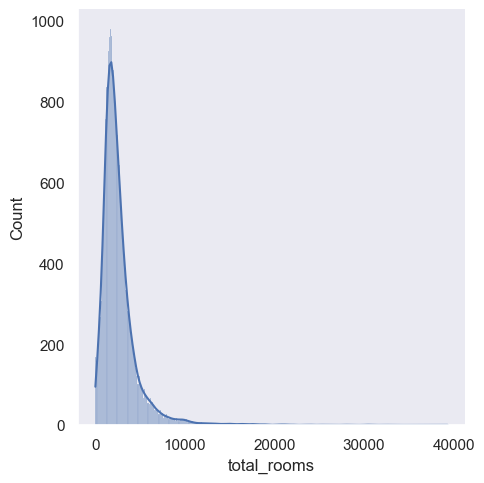

In [19]:
sns.displot(data=df, x='total_rooms', kde=True)

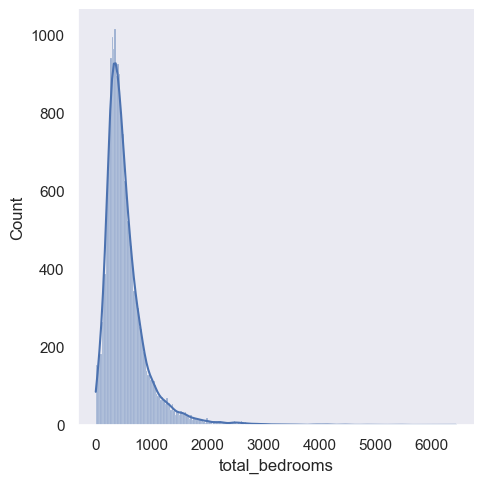

In [20]:
sns.displot(data=df, x='total_bedrooms', kde=True)

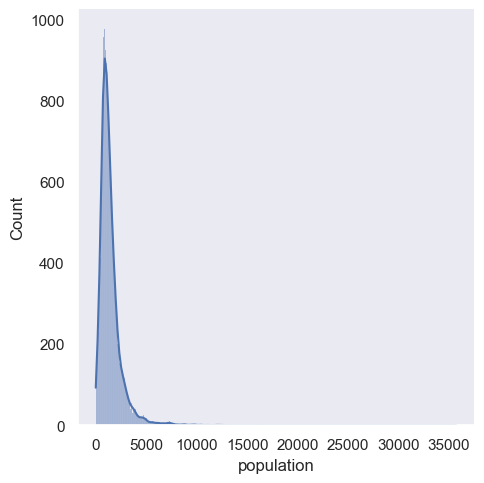

In [21]:
sns.displot(data=df, x='population', kde=True)

### Encoding categorical columns

In [22]:
df.nunique()

longitude               844
latitude                861
housing_median_age       52
total_rooms            5911
total_bedrooms         1923
population             3879
households             1809
median_income         12825
median_house_value     3833
ocean_proximity           5
dtype: int64

In [24]:
le = LabelEncoder()
df['ocean_proximity'] = le.fit_transform(df['ocean_proximity'])

In [25]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [26]:
features_name = df.columns

In [ ]:
features_name

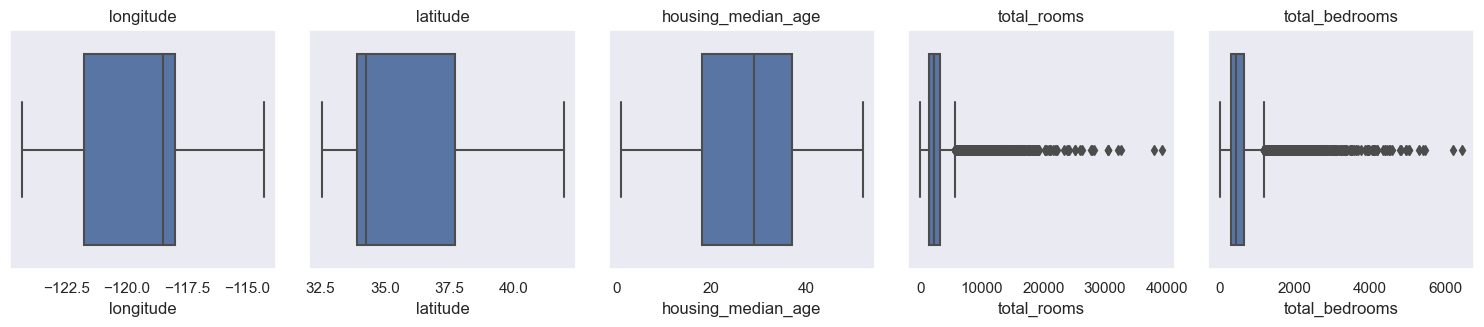

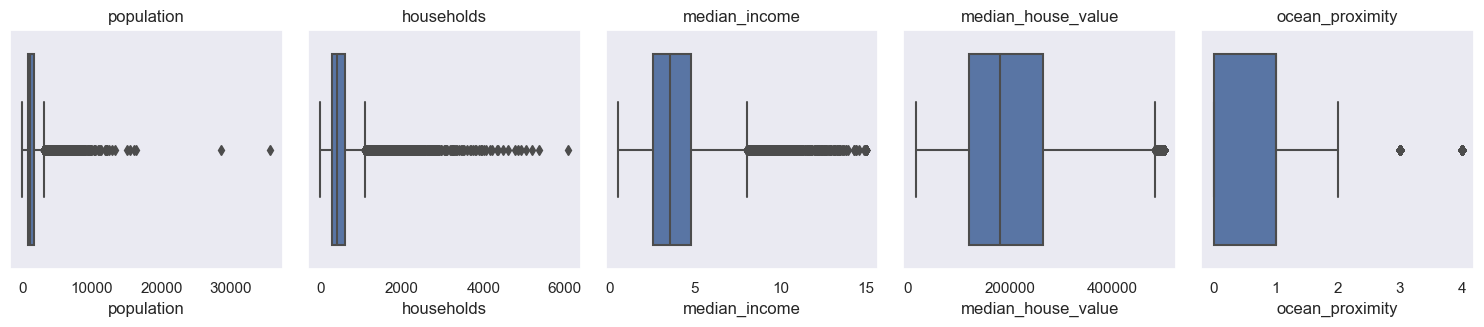

In [29]:
# Split features_name into subsets of 5 features each
for feature_subset in [features_name[i:i+5] for i in range(0, len(features_name), 5)]:
    # Create a FacetGrid with 2 rows and 5 columns
    plt.figure(figsize=(15, 6))
    for i, feature in enumerate(feature_subset):
        plt.subplot(2, 5, i+1)  # Adjust the subplot position
        sns.boxplot(x=feature, data=df)
        plt.title(feature)
    plt.tight_layout()
    plt.show()

In [30]:
def detect_anomalies(data, threshold=2.5):

    mean = np.mean(data)
    std = np.std(data)
    z_scores = (data - mean) / std
    return np.abs(z_scores) > threshold

In [37]:
mask = detect_anomalies(df['population'], threshold=3.5)

In [40]:
df_no_ouliers = df[~mask]

In [223]:
detect_anomalies(df['population'], threshold=3.5).sum()

248

<Axes: >

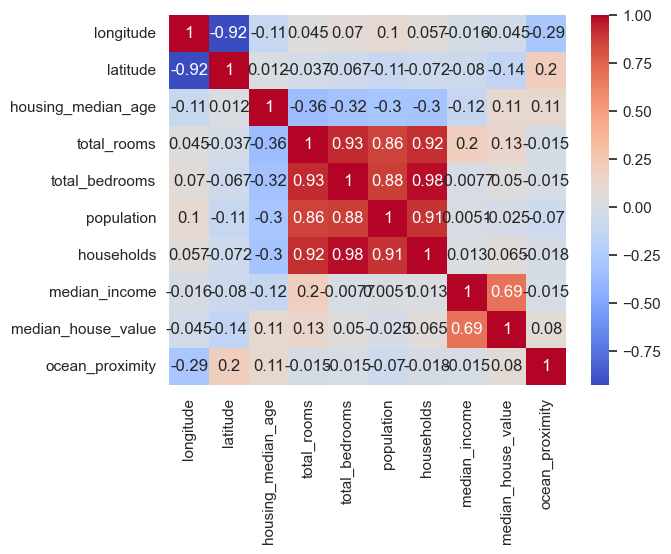

In [49]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [54]:
def load_df(file_path):
    try:
        df = pd.read_csv(file_path)
        logger.info(df.head(2))
        logger.info('dataframe is read!')
        return df

    except Exception as e:
        print(e)

def clean_df_func(df):
    
    # Remove duplicates
    if df.duplicated().sum() != 0:
        logger.info(f'number of duplicates before drop: {df.duplicated().shape[0]}')
        df.drop_duplicats().reset_index(inplace=True, drop=True)
        logger.info(f'number of duplicates after drop: {df.duplicated().shape[0]}')

    if df.isna().sum().sum() != 0:
        logger.info(f'number of missing values before drop: {df.isna().sum()}')
        df = df.dropna().reset_index(drop=True)
        logger.info(f'number of missing values after drop: {df.isna().sum()}')

    le = LabelEncoder()
    df['ocean_proximity'] = le.fit_transform(df['ocean_proximity'])

    return df

def train_test_split_func(df):
    
    selected_features = df[[
        'latitude',
        'housing_median_age',
        'total_bedrooms',
        'population',
        'households',
        'median_income',
        'median_house_value',
        'ocean_proximity']]
    
    X = df.drop(columns='median_house_value', axis=0).values
    y = df[['median_house_value']].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    return X_train, X_test, y_train, y_test
    

    
def build_model(df,X_train, X_test, y_train, y_test):

    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    logger.info('Got predicted y')
    logger.info(f'r2 score is:{linreg.score(X_test, y_test)}')
    return linreg

def evaluate
    

In [55]:
if __name__ =="__main__":
    df = load_df('housing.csv')
    clean_df = clean_df_func(df)
    X_train, X_test, y_train, y_test = train_test_split_func(clean_df)
    model = build_model(df,X_train, X_test, y_train, y_test)

2024-02-09 15:07:50.441 | INFO     | __main__:load_df:4 -    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2024-02-09 15:07:50.460 | INFO     | __main__:load_df:5 - dataframe is read!
2024-02-09 15:07:50.535 | INFO     | __main__:clean_df_func:20 - number of missing values before drop: longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
2024-02-09 15:07:50.560 | 

In [51]:
df = df[['latitude','housing_median_age',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity']]

# Modeling

In [73]:
X = df.drop(columns='median_house_value', axis=0).values
y = df[['median_house_value']].values

In [74]:
X_income = X[:,5]

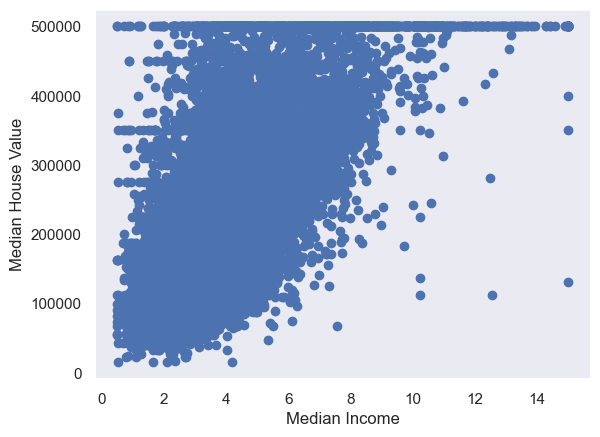

In [77]:
plt.scatter(X_income, y)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [109]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

In [99]:
linreg.score(X_test, y_test)

0.5800000040147375

In [104]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [101]:
mean_squared_error(y_test, y_pred, squared=False)

75379.74984133132

In [102]:
mean_absolute_error(y_test, y_pred)

56428.852106757186

In [105]:
r2_score(y_test, y_pred)

0.5800000040147375

## Efect of income on house price

In [79]:
X_income.shape

(20433,)

In [83]:
X_income = X[:,5].reshape(-1, 1)

In [86]:
y.shape

(20433, 1)

In [84]:
X_income.shape

(20433, 1)

In [88]:
linreg1 = LinearRegression()
linreg1.fit(X_income, y)
predictions = linreg1.predict(X_income)

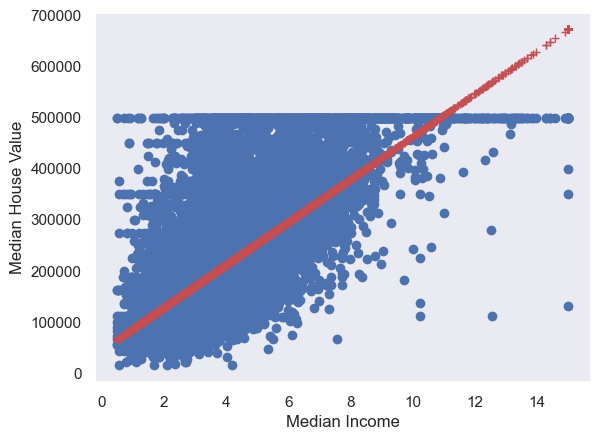

In [92]:
plt.scatter(X_income, y)
plt.plot(X_income, predictions, 'r+')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()        

In [106]:
from sklearn.model_selection import cross_val_score, KFold

In [130]:
np.mean(cross_val_score(linreg, X, y, n_jobs=-1, cv=5, scoring='r2'))

0.4936653238928372

In [126]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [131]:
cv_result = cross_val_score(linreg, X, y, n_jobs=-1, cv=kf, scoring='r2')

In [132]:
print(np.mean(cv_result), np.std(cv_result))

0.5675947086523364 0.020458712590947996


In [134]:
from sklearn.linear_model import Ridge, Lasso

In [141]:
scores = []
r2 = []
for alpha in [0.001, 0.1, 1, 10, 100, 1000]:
    ridge = Ridge(alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
    r2.append(r2_score(y_test, y_pred))
    



In [142]:
scores

[0.5800000037042379,
 0.5799999729631088,
 0.579999693353654,
 0.5799968829303401,
 0.5799673512971149,
 0.5795346163055594]

In [143]:
r2

[0.5800000037042379,
 0.5799999729631088,
 0.579999693353654,
 0.5799968829303401,
 0.5799673512971149,
 0.5795346163055594]

In [154]:
scores_test = []
scores_train = []
for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    laso = Lasso(alpha)
    laso.fit(X_train, y_train)
    y_pred = laso.predict(X_test)
    scores_test.append(laso.score(X_test, y_test))
    scores_train.append(laso.score(X_train, y_train))

In [155]:
scores_test

[0.5800000006192114,
 0.5799996643783376,
 0.5799966000524002,
 0.5799931792080106,
 0.5799828153612673]

In [156]:
scores_train

[0.5662984131461098,
 0.5662984130606055,
 0.5662984045948216,
 0.5662983789409299,
 0.5662981993637095]

In [149]:
names = df.drop(columns='median_house_value', axis=0).columns

In [150]:
names

Index(['latitude', 'housing_median_age', 'total_bedrooms', 'population',
       'households', 'median_income', 'ocean_proximity'],
      dtype='object')

In [157]:
lasso = Lasso(alpha=0.1)

In [158]:
lasso_coef = lasso.fit(X, y).coef_

In [159]:
lasso_coef

array([-6.28201922e+03,  1.90882993e+03,  7.76888759e+00, -4.36633195e+01,
        1.42677373e+02,  4.25936061e+04,  5.68402898e+03])

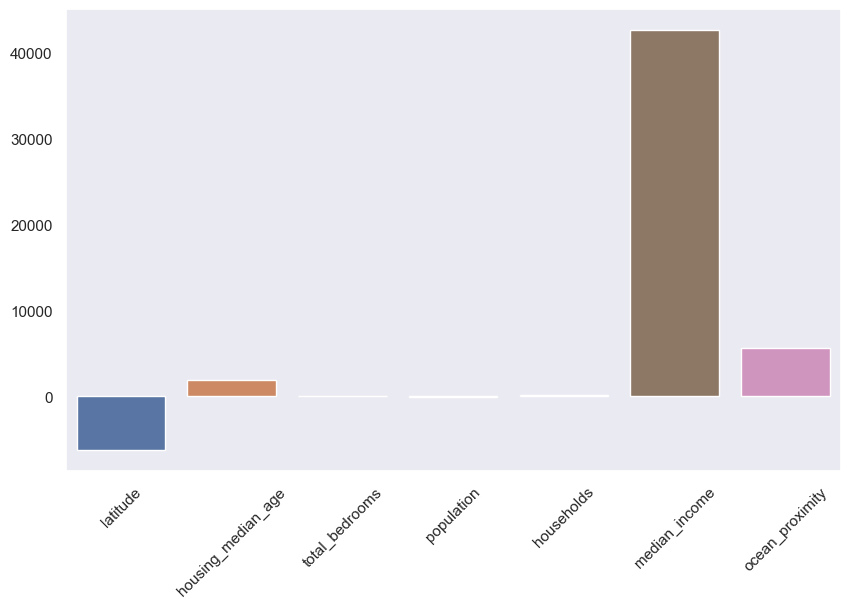

In [165]:
plt.figure(figsize=(10, 6))
sns.barplot(x=names, y=lasso_coef)
plt.xticks(rotation=45)
plt.show()